In [1]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv('preprocessed_dataset_for_tweets.csv')
print("Number of tweets: ",len(df['tweet']))
df.head(5)

Number of tweets:  154117


,Unnamed: 0,tweet,tokens
0,0,Data as a new design material: ethical implica...,data new design material ethical implications ...
1,1,"IT graduates, the monies are steeped on your s...",graduate monies steep global demand skills art...
2,2,"Third, the last principle of generosity experi...",principle generosity experience design tech ac...
3,3,@CubanBTC @Sim_Startup_ @cantrell •Computer vi...,vision engineer data engineer algorithm engine...
4,4,Non-tech roles: • Human Resources • Artificia...,non tech roles human resources artificial inte...


In [3]:
# Preparing a corpus for analysis and checking first 100 entries
corpus=[]
a=[]
for i in range(len(df['tokens'])):
        a=df['tokens'][i]
        corpus.append(a)
        
corpus[0:1000]

['data new design material ethical implications user experience trend ai ml article identify amp digest granola machine drive rss bot ramsey elbasheer',
 'graduate monies steep global demand skills artificial intelligence machine learn ai ml cloud compute big data business intelligence data visualization bi dv user interface user experience ui ux',
 'principle generosity experience design tech accelerant silver bullet delicate start hear things like artificial intelligence small shop try nail data management',
 'vision engineer data engineer algorithm engineer research engineer human resources artificial intelligence writers virtual assistants chatbots designers conversation designer user experience designer user interface designer',
 'non tech roles human resources artificial intelligence writers virtual assistants chatbots designers conversation designer user experience designer user interface designer ai machine learn course simplilearn',
 'web generation internet service connect da

In [4]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\temp" will be used to save temporary dictionary and corpus.


In [5]:
# removing common words and tokenizing
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
# store the dictionary, for future reference
dictionary.save(os.path.join(TEMP_FOLDER, 'AIxDTweet_method1.dict'))

2022-11-29 15:18:43,947 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-11-29 15:18:44,235 : INFO : adding document #10000 to Dictionary<4704 unique tokens: ['ai', 'amp', 'article', 'bot', 'data']...>
2022-11-29 15:18:44,486 : INFO : adding document #20000 to Dictionary<4874 unique tokens: ['ai', 'amp', 'article', 'bot', 'data']...>
2022-11-29 15:18:44,743 : INFO : adding document #30000 to Dictionary<4874 unique tokens: ['ai', 'amp', 'article', 'bot', 'data']...>
2022-11-29 15:18:44,988 : INFO : adding document #40000 to Dictionary<4874 unique tokens: ['ai', 'amp', 'article', 'bot', 'data']...>
2022-11-29 15:18:45,229 : INFO : adding document #50000 to Dictionary<4874 unique tokens: ['ai', 'amp', 'article', 'bot', 'data']...>
2022-11-29 15:18:45,520 : INFO : adding document #60000 to Dictionary<4874 unique tokens: ['ai', 'amp', 'article', 'bot', 'data']...>
2022-11-29 15:18:45,765 : INFO : adding document #70000 to Dictionary<4874 unique tokens: ['ai', 'amp', 'arti

In [6]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'AIxDTweet_method1.mm'), corpus)

2022-11-29 15:18:50,226 : INFO : storing corpus in Matrix Market format to C:\temp\AIxDTweet_method1.mm
2022-11-29 15:18:50,235 : INFO : saving sparse matrix to C:\temp\AIxDTweet_method1.mm
2022-11-29 15:18:50,235 : INFO : PROGRESS: saving document #0
2022-11-29 15:18:50,280 : INFO : PROGRESS: saving document #1000
2022-11-29 15:18:50,316 : INFO : PROGRESS: saving document #2000
2022-11-29 15:18:50,357 : INFO : PROGRESS: saving document #3000
2022-11-29 15:18:50,398 : INFO : PROGRESS: saving document #4000
2022-11-29 15:18:50,421 : INFO : PROGRESS: saving document #5000
2022-11-29 15:18:50,454 : INFO : PROGRESS: saving document #6000
2022-11-29 15:18:50,488 : INFO : PROGRESS: saving document #7000
2022-11-29 15:18:50,535 : INFO : PROGRESS: saving document #8000
2022-11-29 15:18:50,554 : INFO : PROGRESS: saving document #9000
2022-11-29 15:18:50,610 : INFO : PROGRESS: saving document #10000
2022-11-29 15:18:50,640 : INFO : PROGRESS: saving document #11000
2022-11-29 15:18:50,678 : INFO 

2022-11-29 15:18:54,447 : INFO : PROGRESS: saving document #122000
2022-11-29 15:18:54,470 : INFO : PROGRESS: saving document #123000
2022-11-29 15:18:54,498 : INFO : PROGRESS: saving document #124000
2022-11-29 15:18:54,518 : INFO : PROGRESS: saving document #125000
2022-11-29 15:18:54,550 : INFO : PROGRESS: saving document #126000
2022-11-29 15:18:54,583 : INFO : PROGRESS: saving document #127000
2022-11-29 15:18:54,613 : INFO : PROGRESS: saving document #128000
2022-11-29 15:18:54,652 : INFO : PROGRESS: saving document #129000
2022-11-29 15:18:54,704 : INFO : PROGRESS: saving document #130000
2022-11-29 15:18:54,726 : INFO : PROGRESS: saving document #131000
2022-11-29 15:18:54,763 : INFO : PROGRESS: saving document #132000
2022-11-29 15:18:54,798 : INFO : PROGRESS: saving document #133000
2022-11-29 15:18:54,835 : INFO : PROGRESS: saving document #134000
2022-11-29 15:18:54,859 : INFO : PROGRESS: saving document #135000
2022-11-29 15:18:54,904 : INFO : PROGRESS: saving document #13

In [8]:
#initialize a model
tfidf = models.TfidfModel(corpus) 

2022-11-29 15:19:04,726 : INFO : collecting document frequencies
2022-11-29 15:19:04,727 : INFO : PROGRESS: processing document #0
2022-11-29 15:19:04,786 : INFO : PROGRESS: processing document #10000
2022-11-29 15:19:04,816 : INFO : PROGRESS: processing document #20000
2022-11-29 15:19:04,849 : INFO : PROGRESS: processing document #30000
2022-11-29 15:19:04,882 : INFO : PROGRESS: processing document #40000
2022-11-29 15:19:04,909 : INFO : PROGRESS: processing document #50000
2022-11-29 15:19:04,941 : INFO : PROGRESS: processing document #60000
2022-11-29 15:19:04,971 : INFO : PROGRESS: processing document #70000
2022-11-29 15:19:05,011 : INFO : PROGRESS: processing document #80000
2022-11-29 15:19:05,038 : INFO : PROGRESS: processing document #90000
2022-11-29 15:19:05,071 : INFO : PROGRESS: processing document #100000
2022-11-29 15:19:05,109 : INFO : PROGRESS: processing document #110000
2022-11-29 15:19:05,141 : INFO : PROGRESS: processing document #120000
2022-11-29 15:19:05,175 : 

In [9]:
# use the model to transform vectors
corpus_tfidf = tfidf[corpus] 

In [10]:
total_topics = 15

In [11]:
# create a double wrapper over the original corpus.
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] 

2022-11-29 15:19:12,566 : INFO : using symmetric alpha at 0.06666666666666667
2022-11-29 15:19:12,567 : INFO : using symmetric eta at 0.06666666666666667
2022-11-29 15:19:12,569 : INFO : using serial LDA version on this node
2022-11-29 15:19:12,584 : INFO : running online (single-pass) LDA training, 15 topics, 1 passes over the supplied corpus of 154117 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-11-29 15:19:12,585 : INFO : PROGRESS: pass 0, at document #2000/154117
2022-11-29 15:19:13,656 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:13,663 : INFO : topic #13 (0.067): 0.051*"experience" + 0.036*"user" + 0.027*"data" + 0.022*"ai" + 0.015*"art" + 0.014*"learn" + 0.011*"design" + 0.010*"machine" + 0.008*"amp" + 0.007*"book"
2022-11-29 15:19:13,664 : INFO : topic #4 (0.067): 0.049*"experience" + 0.027*"ai" + 0.027*"user" + 0.017

2022-11-29 15:19:15,659 : INFO : topic #9 (0.067): 0.046*"experience" + 0.037*"art" + 0.035*"ai" + 0.033*"data" + 0.031*"design" + 0.016*"user" + 0.011*"like" + 0.010*"drive" + 0.009*"artificial" + 0.009*"intelligence"
2022-11-29 15:19:15,661 : INFO : topic diff=0.144987, rho=0.408248
2022-11-29 15:19:15,662 : INFO : PROGRESS: pass 0, at document #14000/154117
2022-11-29 15:19:16,054 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:16,061 : INFO : topic #10 (0.067): 0.045*"experience" + 0.042*"data" + 0.020*"user" + 0.011*"artificial" + 0.011*"art" + 0.010*"think" + 0.010*"ai" + 0.010*"link" + 0.009*"amp" + 0.009*"intelligence"
2022-11-29 15:19:16,062 : INFO : topic #12 (0.067): 0.040*"experience" + 0.024*"user" + 0.020*"data" + 0.013*"ai" + 0.011*"build" + 0.010*"great" + 0.010*"la" + 0.010*"make" + 0.010*"market" + 0.009*"web"
2022-11-29 15:19:16,064 : INFO : topic #2 (0.067): 0.108*"artificial" + 0.105*"intelligence" + 0.097*"art" + 0.05

2022-11-29 15:19:18,297 : INFO : topic diff=0.156941, rho=0.288675
2022-11-29 15:19:18,299 : INFO : PROGRESS: pass 0, at document #26000/154117
2022-11-29 15:19:18,781 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:18,788 : INFO : topic #5 (0.067): 0.038*"experience" + 0.031*"data" + 0.029*"user" + 0.015*"ai" + 0.012*"course" + 0.011*"amp" + 0.011*"human" + 0.010*"designer" + 0.009*"work" + 0.009*"actually"
2022-11-29 15:19:18,790 : INFO : topic #3 (0.067): 0.046*"user" + 0.044*"experience" + 0.039*"web" + 0.025*"data" + 0.023*"ai" + 0.022*"click" + 0.021*"power" + 0.019*"way" + 0.016*"personalize" + 0.016*"learn"
2022-11-29 15:19:18,794 : INFO : topic #6 (0.067): 0.041*"experience" + 0.020*"data" + 0.018*"ai" + 0.018*"user" + 0.018*"art" + 0.016*"design" + 0.015*"amp" + 0.011*"perform" + 0.010*"learn" + 0.010*"welcome"
2022-11-29 15:19:18,795 : INFO : topic #13 (0.067): 0.048*"experience" + 0.030*"user" + 0.027*"data" + 0.023*"art" + 0.0

2022-11-29 15:19:21,235 : INFO : topic #14 (0.067): 0.045*"data" + 0.043*"user" + 0.041*"experience" + 0.025*"ux" + 0.022*"design" + 0.022*"intelligence" + 0.019*"learn" + 0.017*"ui" + 0.016*"machine" + 0.015*"big"
2022-11-29 15:19:21,236 : INFO : topic #6 (0.067): 0.032*"experience" + 0.018*"perform" + 0.018*"creatives" + 0.016*"data" + 0.016*"art" + 0.016*"ai" + 0.016*"traits" + 0.016*"adcreative" + 0.016*"try" + 0.015*"generate"
2022-11-29 15:19:21,238 : INFO : topic #13 (0.067): 0.042*"experience" + 0.027*"ai" + 0.026*"art" + 0.026*"user" + 0.024*"data" + 0.010*"new" + 0.010*"look" + 0.009*"twitter" + 0.008*"stroke" + 0.008*"music"
2022-11-29 15:19:21,241 : INFO : topic #9 (0.067): 0.047*"art" + 0.043*"ai" + 0.040*"experience" + 0.029*"data" + 0.028*"design" + 0.013*"user" + 0.011*"yes" + 0.011*"article" + 0.010*"implications" + 0.010*"say"
2022-11-29 15:19:21,243 : INFO : topic #5 (0.067): 0.033*"experience" + 0.030*"data" + 0.025*"user" + 0.016*"ai" + 0.014*"course" + 0.012*"amp"

2022-11-29 15:19:23,768 : INFO : topic #4 (0.067): 0.030*"experience" + 0.030*"ai" + 0.028*"design" + 0.021*"human" + 0.021*"art" + 0.019*"better" + 0.018*"amp" + 0.014*"user" + 0.013*"wow" + 0.013*"picture"
2022-11-29 15:19:23,769 : INFO : topic #0 (0.067): 0.049*"experience" + 0.048*"user" + 0.035*"data" + 0.019*"read" + 0.018*"future" + 0.017*"engineer" + 0.013*"ai" + 0.010*"workers" + 0.008*"apple" + 0.008*"intelligence"
2022-11-29 15:19:23,771 : INFO : topic #11 (0.067): 0.064*"ai" + 0.032*"art" + 0.029*"experience" + 0.028*"create" + 0.025*"creative" + 0.018*"work" + 0.016*"humans" + 0.015*"artist" + 0.014*"use" + 0.013*"great"
2022-11-29 15:19:23,774 : INFO : topic #9 (0.067): 0.046*"art" + 0.042*"ai" + 0.042*"experience" + 0.030*"data" + 0.026*"design" + 0.013*"user" + 0.011*"article" + 0.011*"yes" + 0.010*"like" + 0.010*"say"
2022-11-29 15:19:23,775 : INFO : topic diff=0.038546, rho=0.200000
2022-11-29 15:19:23,776 : INFO : PROGRESS: pass 0, at document #52000/154117
2022-11-2

2022-11-29 15:19:26,236 : INFO : topic #0 (0.067): 0.051*"experience" + 0.050*"user" + 0.036*"data" + 0.016*"read" + 0.016*"future" + 0.013*"ai" + 0.013*"engineer" + 0.009*"workers" + 0.009*"designer" + 0.008*"intelligence"
2022-11-29 15:19:26,237 : INFO : topic #10 (0.067): 0.033*"experience" + 0.033*"data" + 0.021*"link" + 0.018*"bio" + 0.017*"image" + 0.014*"user" + 0.014*"original" + 0.012*"artificial" + 0.012*"intelligence" + 0.011*"group"
2022-11-29 15:19:26,239 : INFO : topic #13 (0.067): 0.045*"experience" + 0.028*"user" + 0.025*"art" + 0.025*"data" + 0.025*"ai" + 0.009*"new" + 0.009*"look" + 0.009*"twitter" + 0.007*"time" + 0.007*"job"
2022-11-29 15:19:26,240 : INFO : topic diff=0.038786, rho=0.179605
2022-11-29 15:19:26,243 : INFO : PROGRESS: pass 0, at document #64000/154117
2022-11-29 15:19:26,559 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:26,565 : INFO : topic #12 (0.067): 0.032*"experience" + 0.019*"user" + 0.016*"days" 

2022-11-29 15:19:28,175 : INFO : topic #5 (0.067): 0.033*"experience" + 0.030*"data" + 0.025*"user" + 0.016*"ai" + 0.014*"course" + 0.012*"amp" + 0.011*"human" + 0.010*"actually" + 0.009*"intelligent" + 0.009*"experts"
2022-11-29 15:19:28,177 : INFO : topic diff=0.012468, rho=0.164399
2022-11-29 15:19:28,178 : INFO : PROGRESS: pass 0, at document #76000/154117
2022-11-29 15:19:28,459 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:28,464 : INFO : topic #9 (0.067): 0.048*"art" + 0.044*"ai" + 0.040*"experience" + 0.029*"data" + 0.026*"design" + 0.013*"user" + 0.011*"yes" + 0.011*"article" + 0.010*"say" + 0.010*"bias"
2022-11-29 15:19:28,465 : INFO : topic #13 (0.067): 0.041*"experience" + 0.028*"ai" + 0.027*"art" + 0.026*"user" + 0.023*"data" + 0.010*"new" + 0.009*"look" + 0.009*"music" + 0.008*"twitter" + 0.008*"job"
2022-11-29 15:19:28,466 : INFO : topic #6 (0.067): 0.031*"experience" + 0.023*"generate" + 0.021*"free" + 0.020*"try" + 0.019

2022-11-29 15:19:30,728 : INFO : topic diff=0.019157, rho=0.152499
2022-11-29 15:19:30,729 : INFO : PROGRESS: pass 0, at document #88000/154117
2022-11-29 15:19:31,052 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:31,060 : INFO : topic #10 (0.067): 0.031*"experience" + 0.031*"data" + 0.024*"link" + 0.020*"bio" + 0.019*"image" + 0.015*"original" + 0.014*"artificial" + 0.013*"intelligence" + 0.013*"user" + 0.013*"group"
2022-11-29 15:19:31,060 : INFO : topic #9 (0.067): 0.048*"art" + 0.042*"ai" + 0.042*"experience" + 0.030*"data" + 0.025*"design" + 0.013*"user" + 0.011*"article" + 0.011*"yes" + 0.010*"like" + 0.010*"say"
2022-11-29 15:19:31,061 : INFO : topic #0 (0.067): 0.050*"experience" + 0.049*"user" + 0.035*"data" + 0.018*"future" + 0.018*"read" + 0.013*"ai" + 0.010*"workers" + 0.010*"engineer" + 0.008*"designer" + 0.008*"apple"
2022-11-29 15:19:31,062 : INFO : topic #11 (0.067): 0.069*"ai" + 0.034*"art" + 0.029*"experience" + 0.028*"

2022-11-29 15:19:33,589 : INFO : topic #0 (0.067): 0.052*"experience" + 0.052*"user" + 0.034*"data" + 0.019*"future" + 0.017*"read" + 0.013*"ai" + 0.011*"engineer" + 0.009*"designer" + 0.009*"workers" + 0.008*"apple"
2022-11-29 15:19:33,590 : INFO : topic #6 (0.067): 0.033*"experience" + 0.022*"generate" + 0.018*"free" + 0.018*"data" + 0.017*"perform" + 0.017*"try" + 0.016*"ai" + 0.015*"art" + 0.015*"creatives" + 0.015*"generator"
2022-11-29 15:19:33,591 : INFO : topic #9 (0.067): 0.045*"art" + 0.043*"experience" + 0.041*"ai" + 0.030*"data" + 0.026*"design" + 0.014*"user" + 0.011*"article" + 0.010*"like" + 0.010*"new" + 0.010*"drive"
2022-11-29 15:19:33,592 : INFO : topic #1 (0.067): 0.054*"data" + 0.045*"management" + 0.044*"analysis" + 0.042*"product" + 0.040*"experience" + 0.034*"user" + 0.029*"business" + 0.028*"project" + 0.023*"security" + 0.019*"cyber"
2022-11-29 15:19:33,594 : INFO : topic #10 (0.067): 0.032*"experience" + 0.032*"data" + 0.022*"link" + 0.019*"bio" + 0.018*"imag

2022-11-29 15:19:35,671 : INFO : topic #9 (0.067): 0.048*"art" + 0.043*"ai" + 0.042*"experience" + 0.030*"data" + 0.025*"design" + 0.013*"user" + 0.011*"article" + 0.011*"yes" + 0.010*"like" + 0.010*"say"
2022-11-29 15:19:35,672 : INFO : topic #7 (0.067): 0.046*"design" + 0.033*"ai" + 0.026*"amp" + 0.025*"experience" + 0.019*"intelligence" + 0.018*"artificial" + 0.017*"user" + 0.015*"use" + 0.015*"creative" + 0.013*"technology"
2022-11-29 15:19:35,673 : INFO : topic #12 (0.067): 0.030*"experience" + 0.021*"days" + 0.019*"registrations" + 0.018*"user" + 0.016*"make" + 0.014*"data" + 0.014*"great" + 0.013*"web" + 0.013*"life" + 0.012*"live"
2022-11-29 15:19:35,674 : INFO : topic #0 (0.067): 0.050*"experience" + 0.049*"user" + 0.035*"data" + 0.019*"future" + 0.018*"read" + 0.013*"ai" + 0.010*"workers" + 0.010*"engineer" + 0.008*"designer" + 0.008*"apple"
2022-11-29 15:19:35,676 : INFO : topic diff=0.011796, rho=0.133631
2022-11-29 15:19:35,677 : INFO : PROGRESS: pass 0, at document #11400

2022-11-29 15:19:38,264 : INFO : topic #2 (0.067): 0.183*"artificial" + 0.182*"intelligence" + 0.109*"art" + 0.059*"design" + 0.051*"ai" + 0.034*"learn" + 0.026*"machine" + 0.016*"generate" + 0.016*"change" + 0.011*"create"
2022-11-29 15:19:38,266 : INFO : topic #3 (0.067): 0.039*"user" + 0.038*"experience" + 0.036*"web" + 0.036*"click" + 0.033*"power" + 0.025*"ai" + 0.020*"data" + 0.019*"da" + 0.017*"instantly" + 0.017*"generate"
2022-11-29 15:19:38,269 : INFO : topic #14 (0.067): 0.048*"user" + 0.047*"experience" + 0.046*"data" + 0.030*"learn" + 0.028*"machine" + 0.027*"ux" + 0.022*"design" + 0.021*"intelligence" + 0.018*"ui" + 0.014*"big"
2022-11-29 15:19:38,270 : INFO : topic diff=0.008247, rho=0.127000
2022-11-29 15:19:38,271 : INFO : PROGRESS: pass 0, at document #126000/154117
2022-11-29 15:19:38,634 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:38,640 : INFO : topic #8 (0.067): 0.035*"experience" + 0.030*"data" + 0.029*"leave" + 

2022-11-29 15:19:40,285 : INFO : topic #4 (0.067): 0.032*"design" + 0.032*"experience" + 0.032*"ai" + 0.022*"human" + 0.020*"art" + 0.019*"better" + 0.017*"amp" + 0.014*"user" + 0.013*"like" + 0.012*"picture"
2022-11-29 15:19:40,286 : INFO : topic #7 (0.067): 0.047*"design" + 0.032*"ai" + 0.027*"amp" + 0.026*"experience" + 0.018*"intelligence" + 0.017*"artificial" + 0.017*"user" + 0.016*"use" + 0.014*"creative" + 0.013*"technology"
2022-11-29 15:19:40,287 : INFO : topic diff=0.013725, rho=0.121268
2022-11-29 15:19:40,288 : INFO : PROGRESS: pass 0, at document #138000/154117
2022-11-29 15:19:40,633 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:40,640 : INFO : topic #13 (0.067): 0.042*"experience" + 0.027*"user" + 0.026*"ai" + 0.026*"art" + 0.024*"data" + 0.010*"new" + 0.008*"twitter" + 0.008*"look" + 0.008*"job" + 0.008*"music"
2022-11-29 15:19:40,643 : INFO : topic #6 (0.067): 0.032*"experience" + 0.025*"generate" + 0.020*"free" + 0.019*

2022-11-29 15:19:42,607 : INFO : topic #7 (0.067): 0.049*"design" + 0.034*"ai" + 0.029*"amp" + 0.024*"experience" + 0.019*"intelligence" + 0.018*"artificial" + 0.017*"use" + 0.016*"user" + 0.014*"creative" + 0.013*"media"
2022-11-29 15:19:42,608 : INFO : topic diff=0.006313, rho=0.116248
2022-11-29 15:19:42,610 : INFO : PROGRESS: pass 0, at document #150000/154117
2022-11-29 15:19:42,899 : INFO : merging changes from 2000 documents into a model of 154117 documents
2022-11-29 15:19:42,905 : INFO : topic #11 (0.067): 0.077*"ai" + 0.037*"art" + 0.035*"creative" + 0.028*"experience" + 0.021*"create" + 0.020*"work" + 0.015*"artist" + 0.015*"humans" + 0.014*"use" + 0.012*"dall"
2022-11-29 15:19:42,907 : INFO : topic #2 (0.067): 0.186*"artificial" + 0.184*"intelligence" + 0.110*"art" + 0.059*"design" + 0.052*"ai" + 0.032*"learn" + 0.025*"machine" + 0.016*"change" + 0.016*"generate" + 0.012*"create"
2022-11-29 15:19:42,908 : INFO : topic #9 (0.067): 0.048*"art" + 0.044*"ai" + 0.040*"experience

In [12]:
#Show first n important word in the topics
lda.show_topics(total_topics,15)

[(0,
  '0.060*"experience" + 0.055*"user" + 0.034*"data" + 0.021*"future" + 0.018*"read" + 0.016*"ai" + 0.015*"google" + 0.014*"talk" + 0.011*"speak" + 0.011*"innovation" + 0.010*"engineer" + 0.009*"workers" + 0.008*"age" + 0.008*"open" + 0.008*"impact"'),
 (1,
  '0.055*"data" + 0.046*"analysis" + 0.042*"experience" + 0.042*"product" + 0.039*"user" + 0.037*"management" + 0.033*"subscription" + 0.029*"business" + 0.024*"project" + 0.023*"security" + 0.021*"cyber" + 0.020*"systems" + 0.017*"explore" + 0.016*"career" + 0.016*"join"'),
 (2,
  '0.197*"artificial" + 0.195*"intelligence" + 0.099*"art" + 0.057*"design" + 0.047*"ai" + 0.040*"learn" + 0.034*"machine" + 0.016*"generate" + 0.014*"change" + 0.012*"create" + 0.010*"history" + 0.008*"engineer" + 0.007*"free" + 0.007*"class" + 0.007*"work"'),
 (3,
  '0.047*"user" + 0.045*"experience" + 0.041*"personalize" + 0.034*"power" + 0.032*"optimize" + 0.031*"click" + 0.028*"learn" + 0.027*"web" + 0.023*"generate" + 0.023*"machine" + 0.023*"ai" 

In [13]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [14]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(15, 129)


In [15]:
df_lda

,experience,user,data,future,read,ai,google,talk,speak,innovation,...,music,science,stroke,twitter,ux,big,ui,enhance,customer,ml
0,0.059920,0.054787,0.034314,0.020742,0.01822,0.015653,0.014873,0.013739,0.011203,0.010736,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
1,0.041906,0.038504,0.055036,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.047121,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
3,0.044512,0.047170,0.019286,0.000000,0.00000,0.022626,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
4,0.031569,0.014099,0.000000,0.000000,0.00000,0.033061,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
5,0.038714,0.029376,0.028223,0.000000,0.00000,0.019450,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
6,0.033554,0.015969,0.013574,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
7,0.027585,0.016207,0.000000,0.000000,0.00000,0.032413,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
8,0.035849,0.025218,0.030106,0.000000,0.00000,0.013926,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00
9,0.041554,0.013965,0.028268,0.000000,0.00000,0.045060,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00


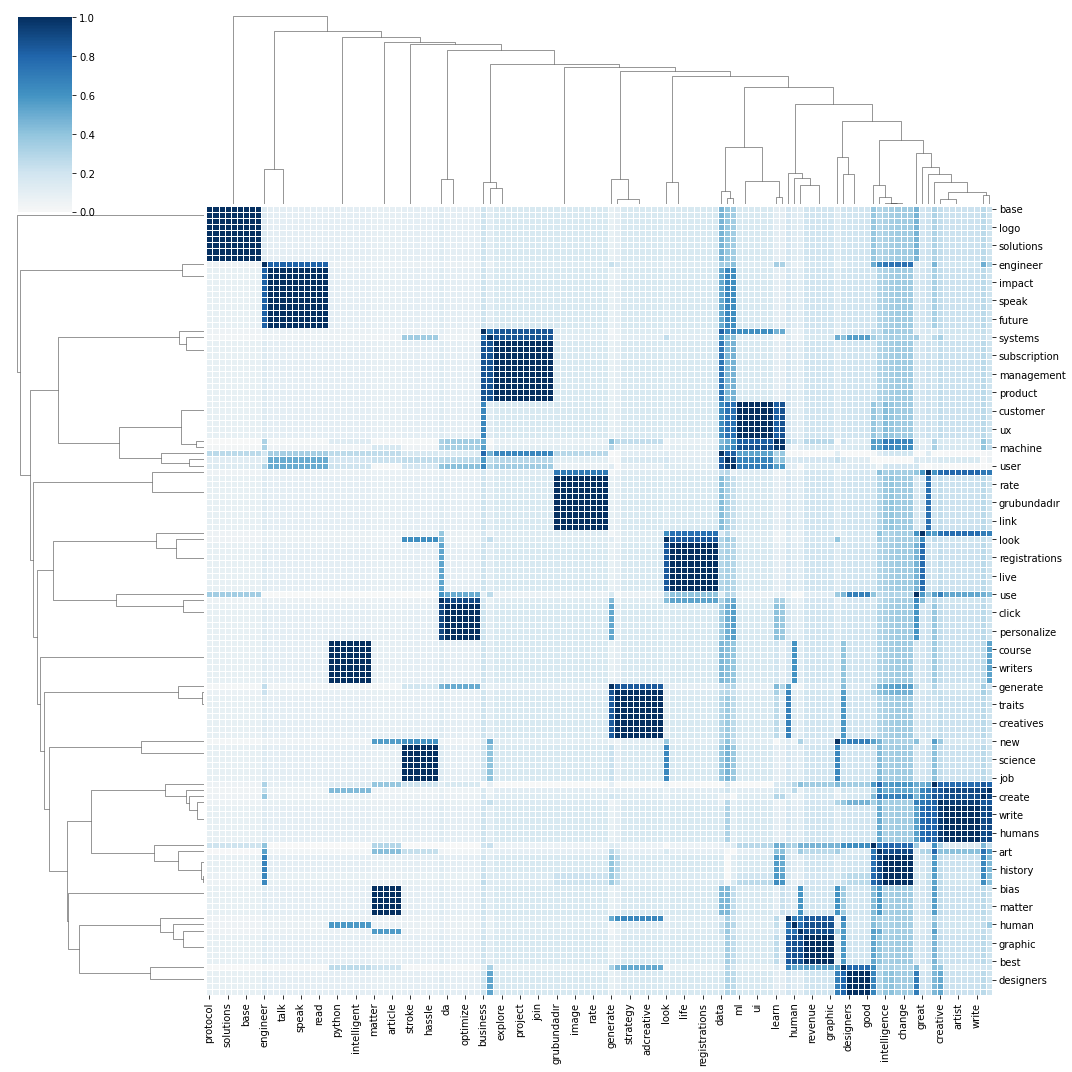

In [16]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [17]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9      114.344879  114.308296       1        1  48.523738
14     105.821045  -93.749626       2        1   5.576782
7     -138.334473   95.320763       3        1   4.781118
2       -7.436697  111.259697       4        1   3.944998
11    -207.550629 -105.472603       5        1   3.631756
1       52.817650   14.603765       6        1   3.531864
6      168.010849    6.806950       7        1   3.335263
4      -94.169601 -157.789551       8        1   3.334971
0     -122.849174  -39.059418       9        1   3.334864
5      -94.894264  195.408295      10        1   3.334109
3       24.927401 -180.464874      11        1   3.334109
13     -53.413467   26.832108      12        1   3.334108
8      -12.255850  -72.093201      13        1   3.334108
10    -224.217957   28.070581      14        1   3.334107
12      36.154255  209.427582      15        1   3.334107, topic_info=             Term         Freq        Total Category  logprob  loglift
192           art  4726.000000  4726.000000  Default  30.0000  30.0000
32   intelligence  1718.000000  1718.000000  Default  29.0000  29.0000
22     artificial  1544.000000  1544.000000  Default  28.0000  28.0000
0              ai  5227.000000  5227.000000  Default  27.0000  27.0000
10     experience  6101.000000  6101.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
187       systems    41.282612   308.264063  Topic15  -4.8237   1.3905
4            data    63.319194  3919.221905  Topic15  -4.3960  -0.7245
0              ai    53.381807  5227.411809  Topic15  -4.5667  -1.1832
93         market    40.509078   322.766633  Topic15  -4.8426   1.3256
5          design    38.222547  3184.677586  Topic15  -4.9007  -1.0217

[950 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3487      8  1.013617     ability
41        1  0.999535  accelerant
3952      4  0.969846  accomplish
3093      2  0.973111      accord
1463      8  0.965536    accuracy
...     ...       ...         ...
568       9  0.018248         yes
568      12  0.006083         yes
568      15  0.004866         yes
3600     14  0.990114        zeka
1618      6  1.027499        zoom

[1990 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 15, 8, 3, 12, 2, 7, 5, 1, 6, 4, 14, 9, 11, 13])